# Sector Rotation Analysis

In [254]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from datetime import datetime

In [269]:
#load daily data from Yahoo Finance

# download 9 sector indexes
businesscycle = ['XLF','XLY','XLK','XLI','XLB','XLE','XLP','XLV','XLU']
data = pdr.get_data_yahoo(businesscycle, start="2000-01-01", end="2019-01-01")


[*********************100%***********************]  9 of 9 downloaded


In [256]:
#Optionally get SP500
#spy = pdr.get_data_yahoo('SPY', start="2000-01-01", end="2019-01-01")

[*********************100%***********************]  1 of 1 downloaded


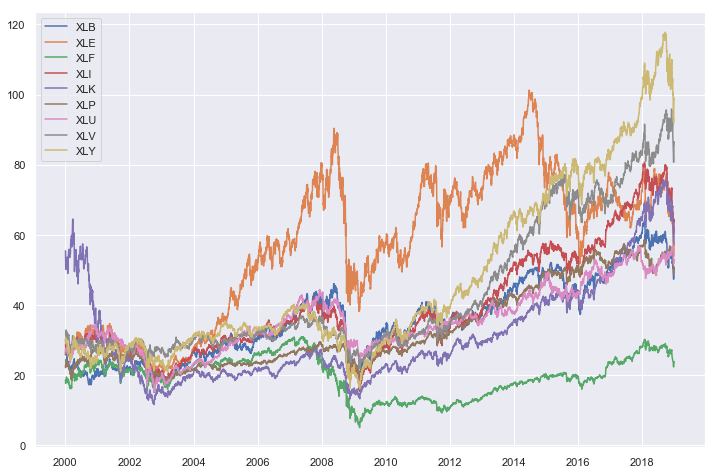

In [270]:
#plt.plot(spy['Close'])
#plt.plot(xlk['Close'])
plt.plot(data['Close'])
plt.legend(data['Close'].columns)
#plt.plot(spy['Close'], color='black', linewidth=3)

In [271]:
#Transform to returns and align them t 1.0 at time T=0

#Calculate the returns 
other = data['Close'].pct_change().fillna(0.0) + 1
#other

#Add a second level column called 'Return'
other = pd.concat([other], axis=1, keys=['Return'])

#Add a second level column called 'Return' (An alternative way)
#other.columns = pd.MultiIndex.from_product([['Return'],other])

#And join it back to the original dataframe
data = data.join(other)

In [272]:
#data.info()

data['Return']
#data['Return'].columns

#temp = data['Return'].cumprod()
#temp[temp.index > '2014-01-01']

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2000-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,0.990373,0.981176,0.956284,0.972372,0.949267,0.971841,0.969836,0.977308,0.969917
2000-01-05,1.041312,1.026379,0.992142,0.995543,0.985153,1.017668,1.025232,0.991030,0.987701
2000-01-06,1.025671,1.038551,1.043915,1.013430,0.966848,1.018750,0.998285,1.003197,1.011370
2000-01-07,0.999431,1.010686,1.016552,1.038103,1.017456,1.063394,1.008598,1.012206,1.047109
2000-01-10,0.996586,0.991653,0.982363,1.000000,1.037990,0.977564,1.003413,1.102256,0.994888
2000-01-11,0.988007,1.001122,0.983425,0.987234,0.971665,1.000000,0.989234,0.973359,0.994348
2000-01-12,0.985549,0.995516,1.019663,0.988145,0.995746,1.005246,0.989693,0.983384,0.994315
2000-01-13,1.004106,1.017455,1.030303,1.019085,1.009153,1.005219,0.990741,1.029821,1.005198


In [274]:
#data['Return'].columns[2:]
data['Return'].columns

Index(['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'], dtype='object')

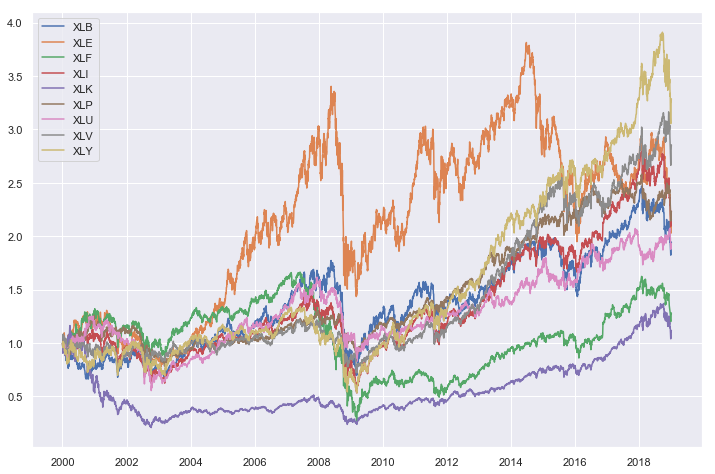

In [275]:
#%matplotlib
#Graph the returns
lines = plt.plot(data['Return'].cumprod())
plt.legend(lines, data['Return'].columns )


In [280]:
#We can also quantatatively narrate this by way of a yearly performance chart

#Define cumulative product, because Resample
def cumprod(x):
    accumulator = 1.0
    for y in x:
        accumulator *= y
    return accumulator

#Resample to yearly returns, and take the cumulative product, convert to percent.
#other periods are 'MS','QS','YS'
yearlyperf = (data['Return'].resample('QS').agg(cumprod) - 1)

#Reorder the sectors according to their business cycle
#yearlyperf.reindex(labels=[businesscycle])
yearlyperf = yearlyperf[businesscycle]


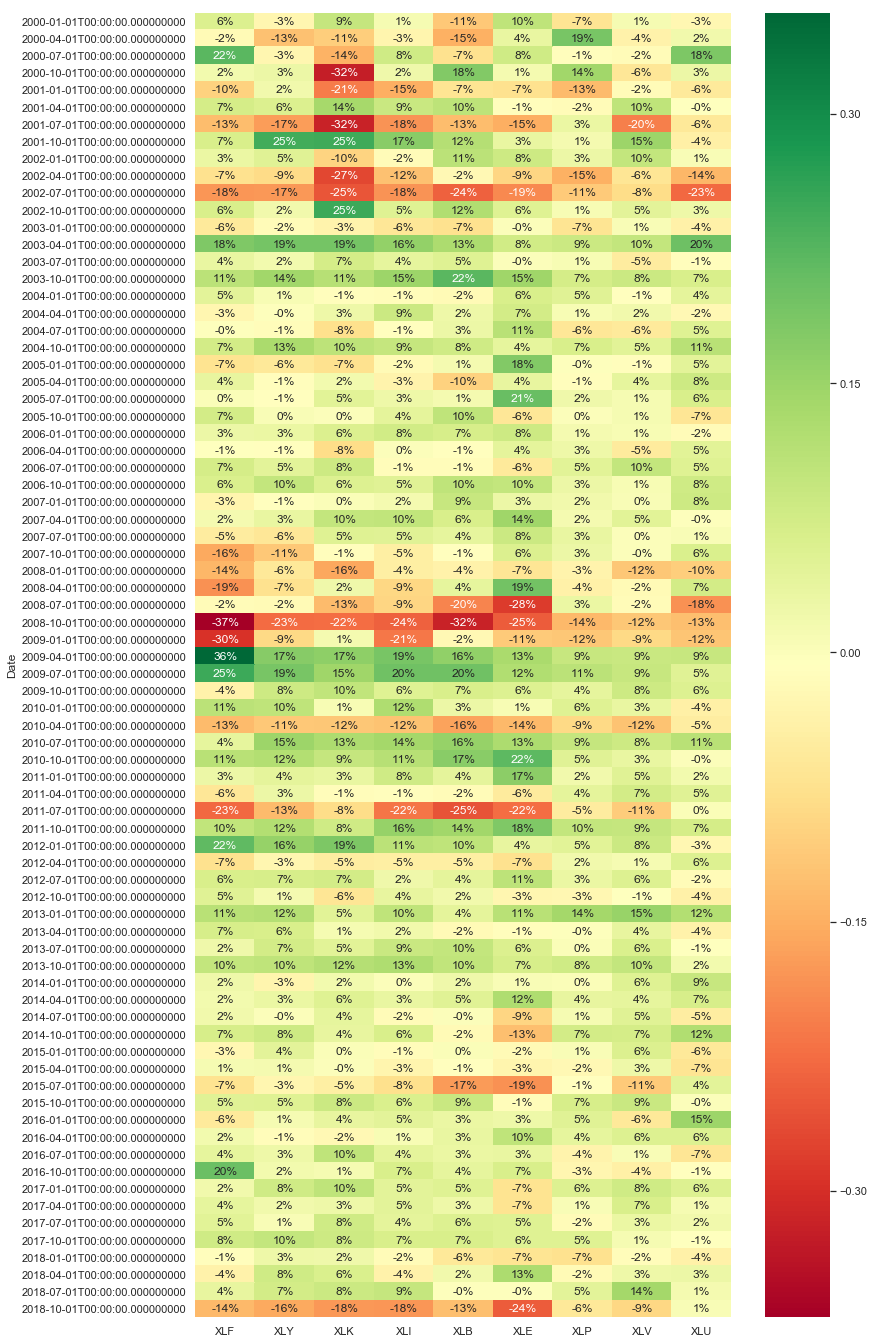

In [281]:
#Plot yearly performance by sector
plt.figure(figsize=(12,24))
import seaborn as sns; sns.set()
ax = sns.heatmap(yearlyperf, annot=True, cmap='RdYlGn', fmt=".0%", xticklabels=True)